In [1]:
# Import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
resp = requests.get('https://data.covid19.go.id/public/api/update.json')
cov_id_raw = resp.json()

print('Komponen cov_id_raw  : %s.' %cov_id_raw.keys())
cov_id_update = cov_id_raw['update']

Komponen cov_id_raw  : dict_keys(['data', 'update']).


In [3]:
#Menampilkan status COVID-19 terkini di Indonesia
print('Update data COVID-19 di Indonesia')
print('Tanggal update data penambahan kasus   :', cov_id_update['penambahan']['tanggal'])
print('Jumlah penambahan kasus sembuh   :', cov_id_update['penambahan']['jumlah_sembuh'])
print('Jumlah penambahan kasus meninggal   :', cov_id_update['penambahan']['jumlah_meninggal'])
print('Jumlah total kasus positif hingga saat ini   :', cov_id_update['total']['jumlah_positif'])
print('Jumlah total kasus sembuh hingga saat ini   :', cov_id_update['total']['jumlah_sembuh'])
print('Jumlah total kasus meninggal hingga saat ini   :', cov_id_update['total']['jumlah_meninggal'])

Update data COVID-19 di Indonesia
Tanggal update data penambahan kasus   : 2021-06-22
Jumlah penambahan kasus sembuh   : 8375
Jumlah penambahan kasus meninggal   : 335
Jumlah total kasus positif hingga saat ini   : 2018113
Jumlah total kasus sembuh hingga saat ini   : 1810136
Jumlah total kasus meninggal hingga saat ini   : 55291


In [4]:
#Mengambil data dari API untuk data COVID-19 tingkat provinsi tertentu.
resp_prov = requests.get('https://data.covid19.go.id/public/api/prov_detail_DKI_JAKARTA.json')
cov_prov_raw = resp_prov.json()

print('Komponen cov_prov_raw  : %s.' %cov_prov_raw.keys())

Komponen cov_prov_raw  : dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data']).


In [5]:
#Menampilkan status terkini COVID-19 di tingkat provinsi.
print('Tanggal update data COVID-19 di ' + cov_prov_raw['provinsi'] + ' : ', cov_prov_raw['last_date'])
print('Jumlah total kasus COVID-19 di ' + cov_prov_raw['provinsi'] + ' : %d' %cov_prov_raw['kasus_total'])
print('Persentase tingkat kesembuhan dari COVID-19 di ' + cov_prov_raw['provinsi'] + ' : %f.2%%' %cov_prov_raw['sembuh_persen'])
print('Persentase kematian akibat COVID-19 di ' + cov_prov_raw['provinsi'] + ' : %f.2%%' %cov_prov_raw['meninggal_persen'])

Tanggal update data COVID-19 di DKI JAKARTA :  2021-06-13
Jumlah total kasus COVID-19 di DKI JAKARTA : 448071
Persentase tingkat kesembuhan dari COVID-19 di DKI JAKARTA : 94.412046.2%
Persentase kematian akibat COVID-19 di DKI JAKARTA : 1.663352.2%


In [6]:
#Menampilkan informasi dan isi dataframe
cov_prov = pd.DataFrame(cov_prov_raw['list_perkembangan'])
print('\nInfo cov_prov:\n', cov_prov.info())
print('\nLima data teratas cov_jabar:\n', cov_prov.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       470 non-null    int64
 1   KASUS                         470 non-null    int64
 2   MENINGGAL                     470 non-null    int64
 3   SEMBUH                        470 non-null    int64
 4   DIRAWAT_OR_ISOLASI            470 non-null    int64
 5   AKUMULASI_KASUS               470 non-null    int64
 6   AKUMULASI_SEMBUH              470 non-null    int64
 7   AKUMULASI_MENINGGAL           470 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  470 non-null    int64
dtypes: int64(9)
memory usage: 33.2 KB

Info cov_prov:
 None

Lima data teratas cov_jabar:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1583020800000      2          0       0                   2   
1  1583107200000      2          0       0   

In [7]:
#Memfilter kolom yang dibuthkan untuk visualisasi
cov_prov_tidy = (cov_prov.drop(columns=[item for item in cov_prov.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )

cov_prov_tidy['tanggal'] = pd.to_datetime(cov_prov_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_prov_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-01           2          0       0
1 2020-03-02           2          0       0
2 2020-03-03           2          0       0
3 2020-03-04           2          0       0
4 2020-03-05           0          1       0


<Figure size 432x288 with 0 Axes>

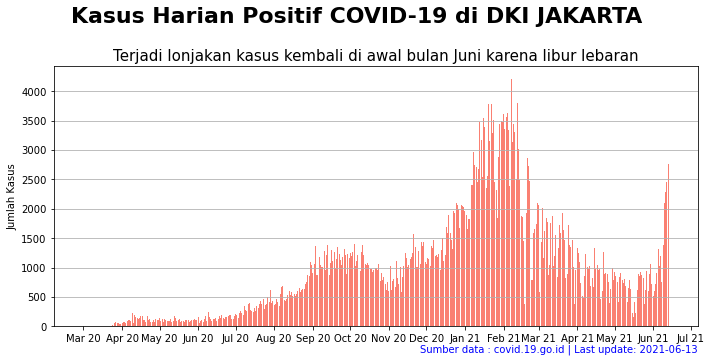

In [8]:
#Visualisasi kasus harian COVID-19 di 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_prov_tidy, x='tanggal', height='kasus_baru', color='salmon')
fig.suptitle('Kasus Harian Positif COVID-19 di ' + cov_prov_raw['provinsi'], 
             y=1.00, fontsize=22, fontweight='bold', ha='center')
ax.set_title('Terjadi lonjakan kasus kembali di awal bulan Juni karena libur lebaran',
             fontsize=15, ha='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber data : covid.19.go.id' + ' | Last update: ' + cov_prov_raw['last_date'], color='blue',
        ha='right', transform=ax.transAxes)


ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

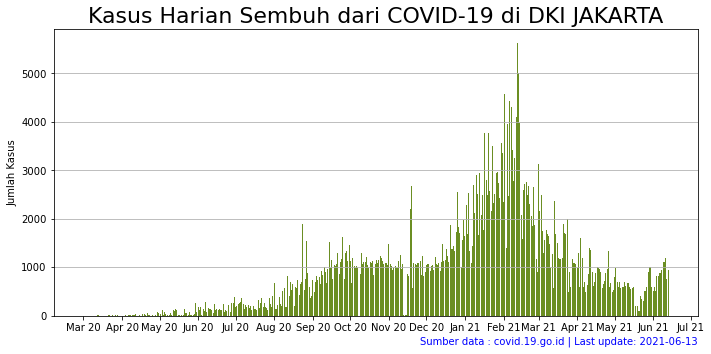

In [9]:
#Visualisasi kasus harian sembuh
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_prov_tidy, x='tanggal', height='sembuh', color='olivedrab')
ax.set_title('Kasus Harian Sembuh dari COVID-19 di ' + cov_prov_raw['provinsi'],
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber data : covid.19.go.id' + ' | Last update: ' + cov_prov_raw['last_date'], color='blue',
        ha='right', transform=ax.transAxes)


ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

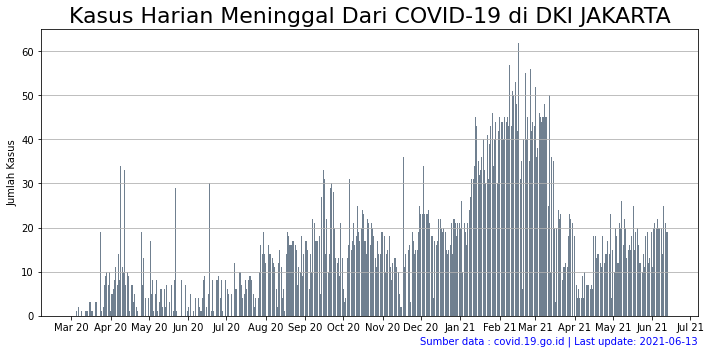

In [10]:
#Visualisasi kasus harian meninggal
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_prov_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di ' + cov_prov_raw['provinsi'] ,
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah Kasus')
ax.text(1, -0.1, 'Sumber data : covid.19.go.id' + ' | Last update: ' + cov_prov_raw['last_date'], color='blue',
        ha='right', transform=ax.transAxes)


ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [11]:
#Set data untuk visualisasi perbandingan kasus baru antar pekan
cov_prov_pekanan = (cov_prov_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_prov_pekanan['tahun'] = cov_prov_pekanan['tanggal'].apply(lambda x: x.year)
cov_prov_pekanan['pekan_ke'] =cov_prov_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_prov_pekanan = cov_prov_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_prov_pekanan:', cov_prov_pekanan.info())
print('\nLima data teratas cov_prov_pekanan:\n', cov_prov_pekanan.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     68 non-null     int64
 1   pekan_ke  68 non-null     int64
 2   jumlah    68 non-null     int64
dtypes: int64(3)
memory usage: 1.7 KB
Info cov_prov_pekanan: None

Lima data teratas cov_prov_pekanan:
    tahun  pekan_ke  jumlah
0   2020         9       2
1   2020        10       6
2   2020        11      16
3   2020        12      22
4   2020        13     248


In [12]:
#Membuat kolom lebih_baik sebagai hasil perbandingan pekan saat ini lebih baik dari pekan sebelumnya
cov_prov_pekanan['jumlah_pekanlalu'] = cov_prov_pekanan['jumlah'].shift().replace(np.nan, 0).astype(int)
cov_prov_pekanan['lebih_baik'] = cov_prov_pekanan['jumlah'] < cov_prov_pekanan['jumlah_pekanlalu']
print('Sepuluh data teratas:\n', cov_prov_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020         9       2                 0       False
1   2020        10       6                 2       False
2   2020        11      16                 6       False
3   2020        12      22                16       False
4   2020        13     248                22       False
5   2020        14     421               248       False
6   2020        15     933               421       False
7   2020        16     958               933       False
8   2020        17     749               958        True
9   2020        18     762               749       False


<Figure size 432x288 with 0 Axes>

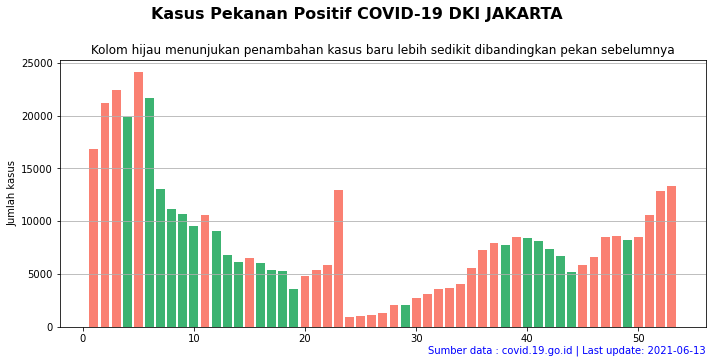

In [13]:
#Visualisasi kasus pekanan dengan menunjukan bar hijau untuk lebih baik dan bar merah untuk lebih buruk
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_prov_pekanan, x='pekan_ke', height='jumlah', 
       color=['mediumseagreen' if x is True else 'salmon' for x in cov_prov_pekanan['lebih_baik']])
fig.suptitle('Kasus Pekanan Positif COVID-19 ' + cov_prov_raw['provinsi'],
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan pekan sebelumnya', fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data : covid.19.go.id' + ' | Last update: ' + cov_prov_raw['last_date'], color='blue',
        ha='right', transform=ax.transAxes)

plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

In [14]:
#Membuat dataset untuk visualisasi perbandingan akumulasi kasus aktif, sembuh dan meninggal
cov_prov_akumulasi = cov_prov_tidy[['tanggal']].copy()
cov_prov_akumulasi['akumulasi_aktif'] = (cov_prov_tidy['kasus_baru'] - cov_prov_tidy['sembuh']
                                         - cov_prov_tidy['meninggal']).cumsum()
cov_prov_akumulasi['akumulasi_sembuh'] = cov_prov_tidy['sembuh'].cumsum()
cov_prov_akumulasi['akumulasi_meninggal'] = cov_prov_tidy['meninggal'].cumsum()
cov_prov_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
465,2021-06-09,12074,419026,7326
466,2021-06-10,13035,420131,7351
467,2021-06-11,14125,421313,7372
468,2021-06-12,15815,422059,7391
469,2021-06-13,17630,422994,7410


<Figure size 432x288 with 0 Axes>

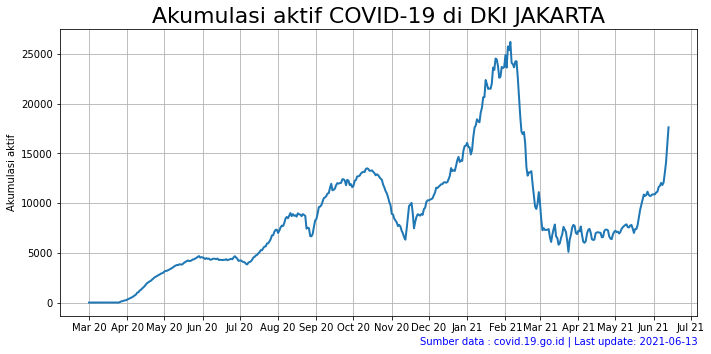

In [15]:
#Visualisasi data akumulasi kasus aktif
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_prov_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di ' + cov_prov_raw['provinsi'],
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data : covid.19.go.id' + ' | Last update: ' + cov_prov_raw['last_date'], color='blue',
        ha='right', transform=ax.transAxes)


ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.grid()
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

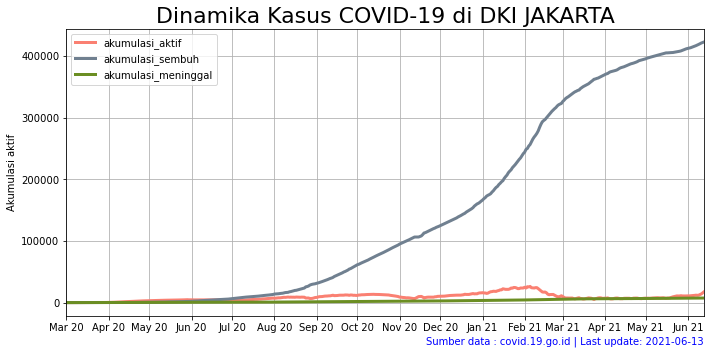

In [16]:
#Visualisasi data akumulasi kasus  sembuh, aktif dan meninggal.
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_prov_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3, color=['salmon','slategrey','olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di ' + cov_prov_raw['provinsi'], fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data : covid.19.go.id' + ' | Last update: ' + cov_prov_raw['last_date'], color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

plt.grid()
plt.tight_layout()
plt.show()